In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
data=pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2023-06-05/visualisations/listings.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0,NaN
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1,NaN
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3,NaN
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1,NaN
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23,NaN


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43566 non-null  int64  
 1   name                            43566 non-null  object 
 2   host_id                         43566 non-null  int64  
 3   host_name                       43561 non-null  object 
 4   neighbourhood_group             43566 non-null  object 
 5   neighbourhood                   43566 non-null  object 
 6   latitude                        43566 non-null  float64
 7   longitude                       43566 non-null  float64
 8   room_type                       43566 non-null  object 
 9   price                           43566 non-null  int64  
 10  minimum_nights                  43566 non-null  int64  
 11  number_of_reviews               43566 non-null  int64  
 12  last_review                     

In [138]:
data.shape

(43566, 18)

In [139]:
(round(data.isnull().sum() / data.shape[0] * 100, 2)).sort_values(ascending=False)

license                           100.00
reviews_per_month                  24.09
last_review                        24.09
host_name                           0.01
minimum_nights                      0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
id                                  0.00
name                                0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
neighbourhood_group                 0.00
host_id                             0.00
price                               0.00
dtype: float64

In [140]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10496
reviews_per_month                 10496
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43566
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>,
        <AxesSubplot:title={'center':'license'}>]], dtype=object)

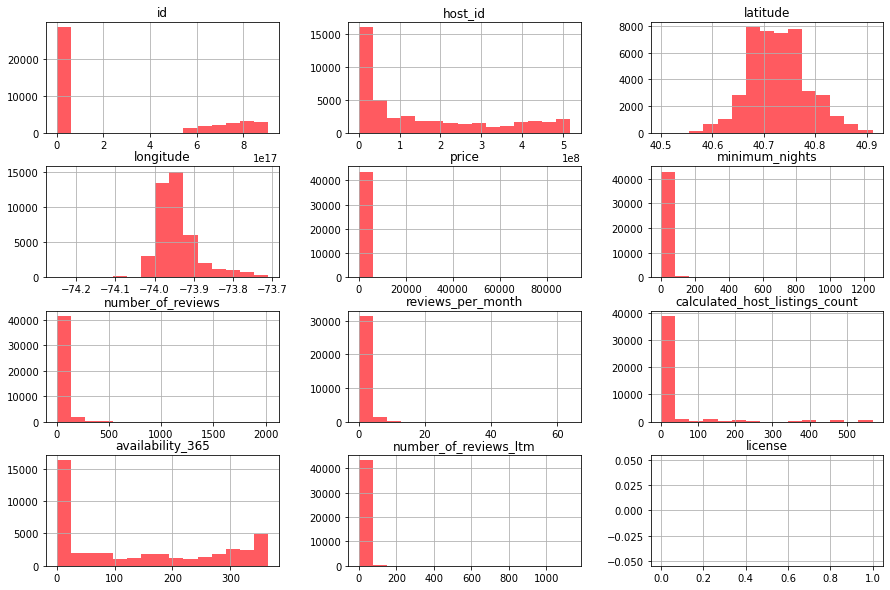

In [141]:
airbnb_pink = '#FF5A60'
data.hist(bins=15,color=airbnb_pink,figsize=(15,10))

In [142]:
data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,43566.000000,43566.000000,43566.000000,33070.000000,43566.000000,43566.000000
mean,225.216109,18.700271,26.368544,1.219748,30.934857,136.998256
std,818.738268,27.804388,57.740520,1.777084,99.108628,137.346191
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.000000,2.000000,1.000000,0.130000,1.000000,0.000000
50%,136.000000,15.000000,5.000000,0.550000,1.000000,89.000000
75%,228.000000,30.000000,24.000000,1.800000,5.000000,278.000000
max,90120.000000,1250.000000,2024.000000,63.950000,569.000000,365.000000


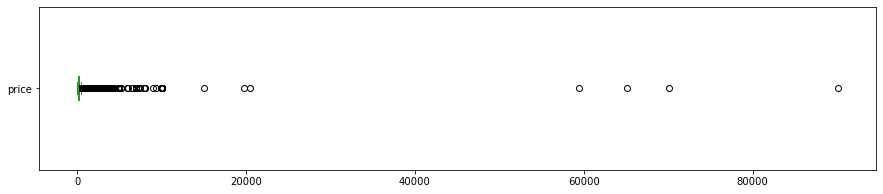

Values over $500.00: 
2610
5.9909%


Values equal to $0: 
16
0.0367%


In [143]:
data['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to $0 and over $500.00
print('Values over $500.00: ')
print(len(data[data['price'] > 500]))
print('{:.4f}%'.format((len(data[data['price'] > 500]) / data.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(data[data['price'] == 0]))
print('{:.4f}%'.format((len(data[data['price'] == 0]) / data.shape[0]) * 100))

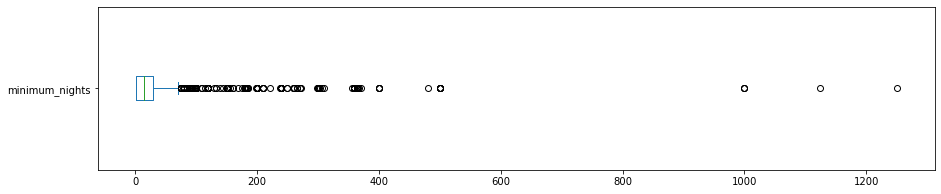

Values over 30 nights: 
2035
4.6711%


In [144]:
data['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(data[data['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(data[data['minimum_nights'] > 30]) / data.shape[0]) * 100))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'number_of_reviews_ltm'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

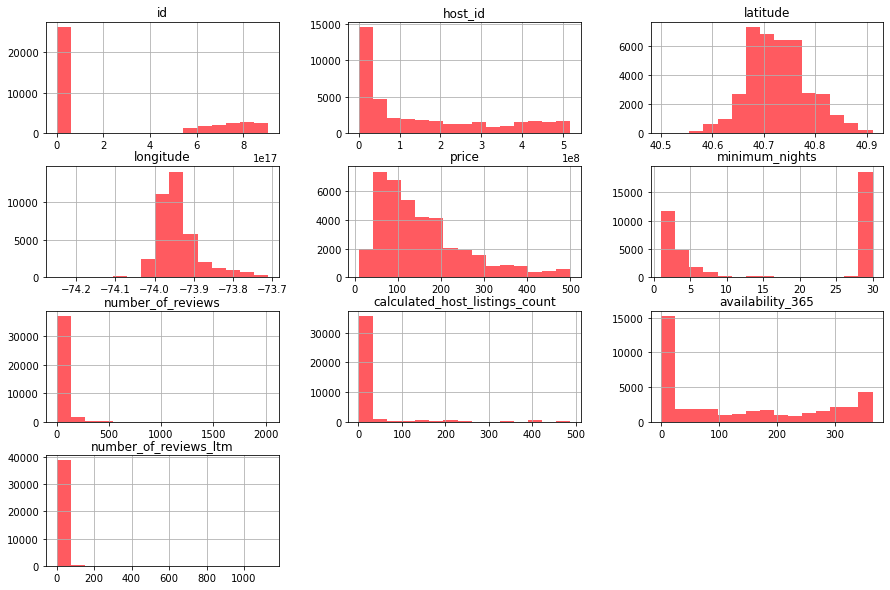

In [145]:
new_data = data[(data['price'] <= 500) & (data['price'] > 0) & (data['minimum_nights'] <= 30)].copy()

# Droping the columns
new_data.drop(['reviews_per_month', 'last_review','license'], axis=1, inplace=True)
new_data.reset_index(drop=True, inplace=True)

# Plotting the histograms againd
#new_data.hist(bins=15, figsize=(15,10))

airbnb_pink = '#FF5A60'

# Create the histogram with 15 bins and figsize (15, 10)
new_data.hist(bins=15,color=airbnb_pink,figsize=(15,10))




In [146]:
corr = new_data[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.179047,0.014140,-0.042533,0.133550
minimum_nights,-0.179047,1.000000,-0.250151,0.186136,-0.195033
number_of_reviews,0.014140,-0.250151,1.000000,-0.104890,0.069557
calculated_host_listings_count,-0.042533,0.186136,-0.104890,1.000000,0.055077
availability_365,0.133550,-0.195033,0.069557,0.055077,1.000000


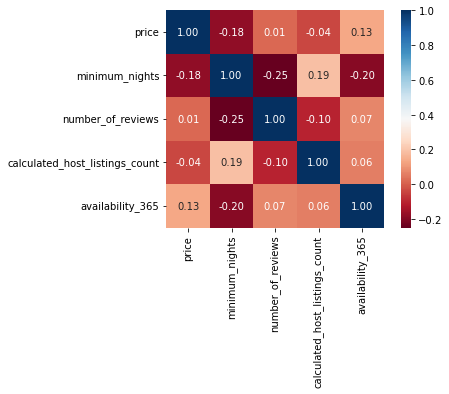

In [147]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Entire home/apt    21487
Private room       16955
Shared room          551
Hotel room            77
Name: room_type, dtype: int64


Entire home/apt    55.00
Private room       43.40
Shared room         1.41
Hotel room          0.20
Name: room_type, dtype: float64




/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



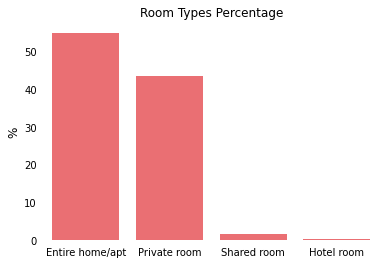

In [148]:
room_type = new_data['room_type'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms for each room type
room_type_pct = round(new_data['room_type'].value_counts(normalize=True)  * 100, 2)

# Displaying the results
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

# Plotting the percentage of rooms for each room type
airbnb_pink = '#FF5A60'
ax = sns.barplot(room_type_pct.index, room_type_pct,color=airbnb_pink) 
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Entire home/apt    21487
Private room       16955
Shared room          551
Hotel room            77
Name: room_type, dtype: int64


Entire home/apt    55.00
Private room       43.40
Shared room         1.41
Hotel room          0.20
Name: room_type, dtype: float64




/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



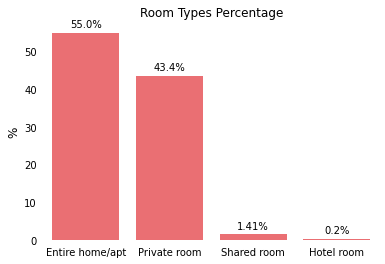

In [149]:
room_type = new_data['room_type'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms for each room type
room_type_pct = round(new_data['room_type'].value_counts(normalize=True) * 100, 2)

# Displaying the results
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

# Plotting the percentage of rooms for each room type
airbnb_pink = '#FF5A60'
ax = sns.barplot(room_type_pct.index, room_type_pct, color=airbnb_pink)
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

# Adding percentage labels to the bars
for index, value in enumerate(room_type_pct):
    ax.text(index, value + 1, str(value) + '%', ha='center', va='bottom', fontsize=10)

plt.show()


room_type
Entire home/apt    16.19
Private room       15.99
Shared room        15.27
Hotel room          5.96
Name: minimum_nights, dtype: float64




/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



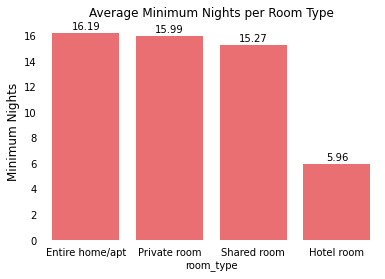

In [150]:
room_type_nights = round(new_data.groupby('room_type').minimum_nights.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(room_type_nights)
print('\n')

# Plotting the average minimum nights per room type
airbnb_pink = '#FF5A60'
ax = sns.barplot(room_type_nights.index, room_type_nights, color=airbnb_pink)
ax.set_title('Average Minimum Nights per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('Minimum Nights', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

# Adding minimum nights labels above the bars
for index, value in enumerate(room_type_nights):
    ax.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


neighbourhood_group
Manhattan        192.24
Brooklyn         141.26
Staten Island    122.06
Queens           118.05
Bronx            112.32
Name: price, dtype: float64




/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



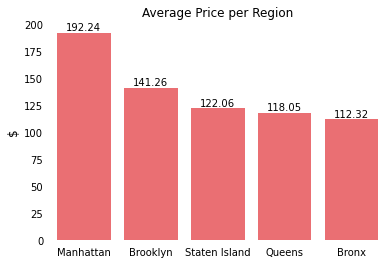

In [151]:
price_region = round(new_data.groupby('neighbourhood_group').price.mean().sort_values(ascending=False), 2)

# Displaying the results
print(price_region)
print('\n')

# Plotting the average price per region
airbnb_pink = '#FF5A60'
colors = [airbnb_pink]

ax = sns.barplot(price_region.index, price_region, palette=colors)
ax.set_title('Average Price per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
for index, value in enumerate(price_region):
    ax.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

In [152]:
import plotly.graph_objects as go

# Assuming you already have the 'new_data' DataFrame with the necessary data

# Calculating the number of rooms per region
room_regions = new_data['neighbourhood_group'].value_counts().sort_values(ascending=False)
total_rooms = len(new_data)

# Calculating the percentage of rooms per region
room_regions_pct = round(room_regions / total_rooms * 100, 2)

# Creating text labels for data labels (including the number of rooms and percentage)
data_labels = []
for region, count, pct in zip(room_regions.index, room_regions, room_regions_pct):
    data_labels.append(f'<b>{count}</b> rooms<br>({pct}%)')

# Plotting the count of rooms per region with data labels inside the bars
fig = go.Figure()

fig.add_trace(go.Bar(
    x=room_regions.index,
    y=room_regions,
    marker=dict(color='rgb(255, 90, 95)'),  # Airbnb pink color
    text=data_labels,  # Data labels displaying count and percentage
    textposition='inside',  # Position of the data labels (inside the bars)
    hoverinfo='none',  # Disable hoverinfo to show only custom data labels
    showlegend=False,  # Hide legend
))

fig.update_layout(
    title='Total Number of Rooms per Region',
    xaxis_title='',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    xaxis_showgrid=False,  # Hide x-axis grid lines
    yaxis_showgrid=True,
    yaxis_gridcolor='lightgray',  # Change y-axis grid color
    yaxis_zeroline=False,  # Hide y-axis zero line
    yaxis_tickprefix='',  # Remove y-axis tick prefix
    yaxis_ticksuffix=' rooms',  # Add y-axis tick suffix
    plot_bgcolor='white',  # Set plot background color
    paper_bgcolor='white',  # Set paper background color
    margin=dict(
        l=100,  # Adjust left margin to make room for data labels
        r=20,
        t=110,
        b=60,  # Adjust bottom margin to make room for x-axis labels
    ),
)

# Adjust x-axis label font size and color
fig.update_xaxes(tickfont=dict(size=12, color='black'))

# Adjust y-axis label font size and color
fig.update_yaxes(tickfont=dict(size=12, color='black'))

# Find the maximum count for setting y-axis range
max_count = room_regions.max()
fig.update_yaxes(range=[0, max_count + max_count * 0.2])  # Adding 20% buffer above the maximum count

# Show figure
fig.show()


In [153]:
room_regions = new_data['neighbourhood_group'].value_counts().sort_values(ascending=False)
total_rooms = len(new_data)

# Calculating the percentage of rooms per region
room_regions_pct = round(room_regions / total_rooms * 100, 2)

# Creating text labels for data labels (including the number of rooms and percentage)
data_labels = []
room_type_info = []  # To store room type information
for region, count, pct in zip(room_regions.index, room_regions, room_regions_pct):
    data_labels.append(f'<b>{count}</b> rooms<br>({pct}%)')
    room_types = new_data[new_data['neighbourhood_group'] == region]['room_type'].unique()
    room_type_info.append('<br>'.join(f'{room}: {new_data[(new_data["neighbourhood_group"] == region) & (new_data["room_type"] == room)].shape[0]}'
                                      for room in room_types))

# Plotting the count of rooms per region with data labels inside the bars
fig = go.Figure()

fig.add_trace(go.Bar(
    x=room_regions.index,
    y=room_regions,
    marker=dict(color='rgb(255, 90, 95)'),  # Airbnb pink color
    text=data_labels,  # Data labels displaying count and percentage
    textposition='inside',  # Position of the data labels (inside the bars)
    hoverinfo='none',  # Disable hoverinfo to show only custom data labels
    showlegend=False,  # Hide legend
))

# Add room type information as annotations above the bars
for x_val, y_val, info in zip(room_regions.index, room_regions, room_type_info):
    fig.add_annotation(
        x=x_val,
        y=y_val,
        text=info,
        showarrow=False,
        font=dict(size=10),
        textangle=0,  # Set textangle to 0 to make it straight (horizontal)
        xanchor='center',  # Center the annotation horizontally
        yanchor='bottom',  # Anchor the annotation to the top of the bar
    )

fig.update_layout(
    title='Total Number of Rooms per Region',
    xaxis_title='',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    xaxis_showgrid=False,  # Hide x-axis grid lines
    yaxis_showgrid=True,
    yaxis_gridcolor='lightgray',  # Change y-axis grid color
    yaxis_zeroline=False,  # Hide y-axis zero line
    yaxis_tickprefix='',  # Remove y-axis tick prefix
    yaxis_ticksuffix=' rooms',  # Add y-axis tick suffix
    plot_bgcolor='white',  # Set plot background color
    paper_bgcolor='white',  # Set paper background color
    margin=dict(
        l=100,  # Adjust left margin to make room for data labels
        r=20,
        t=110,
        b=60,  # Adjust bottom margin to make room for x-axis labels
    ),
)

# Adjust x-axis label font size and color
fig.update_xaxes(tickfont=dict(size=12, color='black'))

# Adjust y-axis label font size and color
fig.update_yaxes(tickfont=dict(size=12, color='black'))

# Find the maximum count for setting y-axis range
max_count = room_regions.max()
fig.update_yaxes(range=[0, max_count + max_count * 0.2])  # Adding 20% buffer above the maximum count

# Show figure
fig.show()

In [155]:
text_values = corr.applymap(lambda x: f'{x:.2f}')

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(z=corr.values,
                                x=corr.columns,
                                y=corr.index,
                                colorscale='RdBu',
                                zmin=-1,
                                zmax=1,
                                hoverongaps=False,
                                text=text_values,  # Use the pre-calculated text_values for displaying correlation values
                                hoverinfo='none'  # Disable hoverinfo to show correlation values without hovering
                                ))

# Add annotations with correlation values on each box of the heatmap
for i, y_val in enumerate(corr.index):
    for j, x_val in enumerate(corr.columns):
        fig.add_annotation(
            x=x_val,
            y=y_val,
            text=text_values.iloc[i, j],
            showarrow=False,
            font=dict(size=12),
            xanchor='center',
            yanchor='middle'
        )

# Customize the heatmap layout (optional)
fig.update_layout(title_text='Correlation Heatmap',
                  title_font_size=24,
                  xaxis_title='Features',
                  yaxis_title='Features',
                  width=600,
                  height=600)

# Display the heatmap
fig.show()

Text(0, 0.5, 'Price')

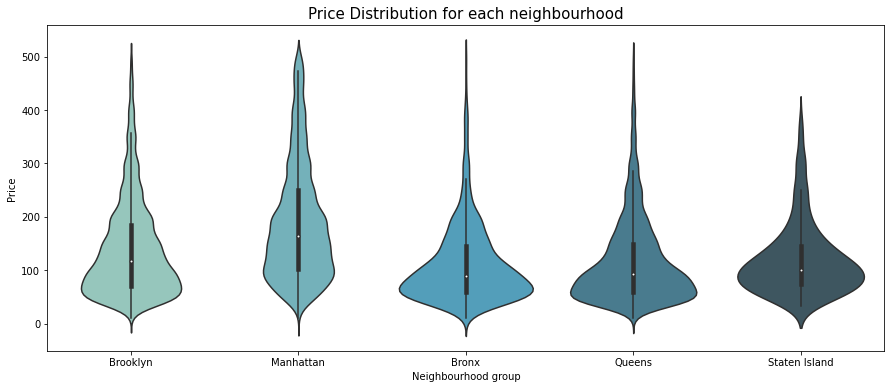

In [156]:
plt.figure(figsize=(15,6))
sns.violinplot(data=new_data[new_data.price <500], x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Price Distribution for each neighbourhood', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

In [157]:
new_data.neighbourhood.value_counts().head(10)

Bedford-Stuyvesant    2992
Williamsburg          2408
Harlem                1963
Bushwick              1697
Midtown               1516
Upper East Side       1383
Hell's Kitchen        1366
Upper West Side       1336
Crown Heights         1280
East Village          1045
Name: neighbourhood, dtype: int64

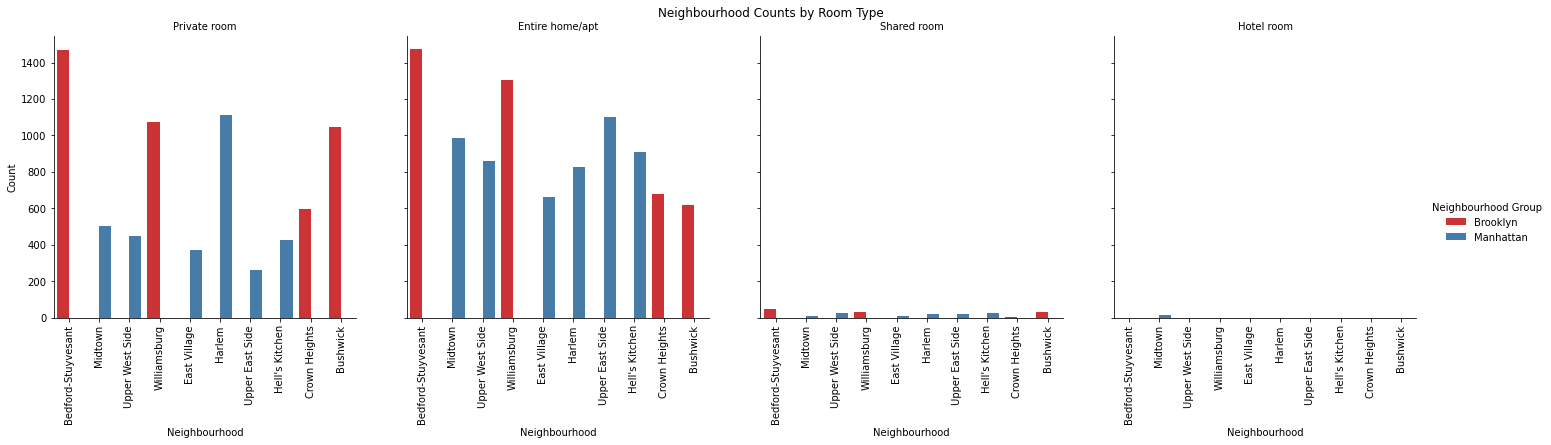

In [158]:
sub_7 = new_data.loc[new_data['neighbourhood'].isin(['Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick', 'Midtown',
                                                     'Upper East Side', 'Hell\'s Kitchen', 'Upper West Side', 'Crown Heights', 'East Village'])]

# Define a custom color palette
custom_palette = sns.color_palette('Set1', n_colors=10)

# Using catplot with the custom color palette
viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count', palette=custom_palette)
viz_3.set_xticklabels(rotation=90)

# Adjusting plot aesthetics
viz_3.set_axis_labels('Neighbourhood', 'Count')
viz_3.set_titles('{col_name}')
viz_3._legend.set_title('Neighbourhood Group')
plt.subplots_adjust(top=0.9)  # Adjust title position
viz_3.fig.suptitle('Neighbourhood Counts by Room Type')
plt.show()

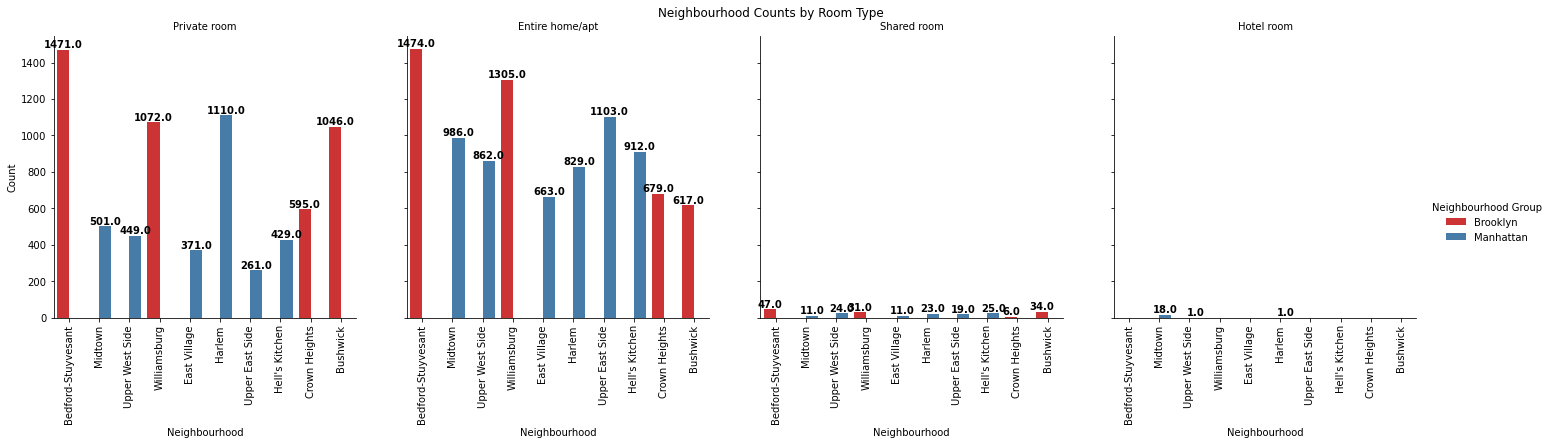

In [159]:
sub_7 = new_data.loc[new_data['neighbourhood'].isin(['Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick', 'Midtown',
                                                     'Upper East Side', 'Hell\'s Kitchen', 'Upper West Side', 'Crown Heights', 'East Village'])]

# Define a custom color palette
custom_palette = sns.color_palette('Set1', n_colors=10)

# Using catplot with the custom color palette
viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count', palette=custom_palette)
viz_3.set_xticklabels(rotation=90)

# Adjusting plot aesthetics
viz_3.set_axis_labels('Neighbourhood', 'Count')
viz_3.set_titles('{col_name}')
viz_3._legend.set_title('Neighbourhood Group')
plt.subplots_adjust(top=0.9)  # Adjust title position
viz_3.fig.suptitle('Neighbourhood Counts by Room Type')

# Add labels for each plot
for ax in viz_3.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

In [160]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Top 25 most occurring words in the 'name' column:
1: 84361
in: 39070
bath: 32846
rental: 28056
unit: 28056
bedroom: 26652
bed: 24948
2: 17490
new: 17255
york: 15369
brooklyn: 15012
beds: 13512
shared: 11733
bedrooms: 9182
baths: 6111
queens: 6061
3: 5699
50: 4631
home: 4183
studio: 3198
private: 2727
4: 1970
condo: 1925
15: 1797
townhouse: 1652


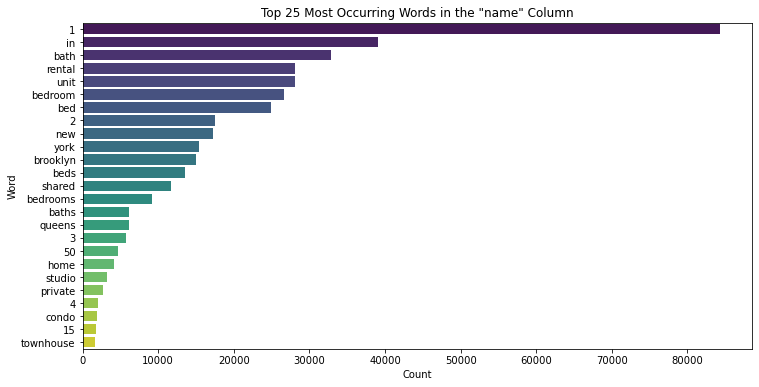

In [161]:
import re
from collections import Counter


# Assuming you have the data loaded into a DataFrame called 'data'
# Replace 'name' with the actual column name in your dataset
# Example: data['your_column_name']

# Step 1: Preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the preprocessing to the 'name' column
new_data['name'] = new_data['name'].apply(preprocess_text)

# Step 2: Tokenize the text
all_words = ' '.join(new_data['name']).split()

# Step 3: Count the occurrences of each word
word_counts = Counter(all_words)

# Step 4: Sort and display the top 25 words
top_25_words = word_counts.most_common(25)
print("Top 25 most occurring words in the 'name' column:")
for word, count in top_25_words:
    print(f"{word}: {count}")

# Optionally, you can also create a bar plot to visualize the top 25 words
top_words_df = pd.DataFrame(top_25_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 25 Most Occurring Words in the "name" Column')
plt.show()


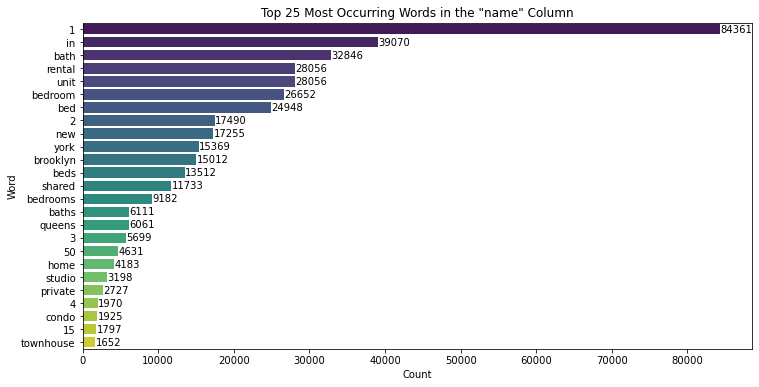

In [218]:
import re
from collections import Counter

# ... (Your existing code for preprocessing and counting word occurrences)

# Optionally, you can also create a bar plot to visualize the top 25 words
top_words_df = pd.DataFrame(top_25_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 25 Most Occurring Words in the "name" Column')

# Add labels to the bars
for index, value in enumerate(top_words_df['Count']):
    plt.text(value + 50, index, str(value), va='center')

plt.show()


In [231]:
pred = new_data

In [232]:
pred.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15502,1542506,2,95,40.81766,-73.94472,2,10,30,4,1,0,0
21219,33620899,3,221,40.74909,-73.89678,0,10,30,0,1,0,0
10608,151547086,0,148,40.87553,-73.88601,2,10,3,24,1,0,0
1048,5707409,2,202,40.76915,-73.95636,0,10,30,272,1,236,4
9224,62685070,1,27,40.69979,-73.92120,2,10,30,0,1,0,0


In [234]:
#pred.drop(['name', 'host_name','id'], inplace=True, axis=1)

In [235]:
pred.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15502,1542506,2,95,40.81766,-73.94472,2,10,30,4,1,0,0
21219,33620899,3,221,40.74909,-73.89678,0,10,30,0,1,0,0
10608,151547086,0,148,40.87553,-73.88601,2,10,3,24,1,0,0
1048,5707409,2,202,40.76915,-73.95636,0,10,30,272,1,236,4
9224,62685070,1,27,40.69979,-73.92120,2,10,30,0,1,0,0


In [236]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

le = preprocessing.LabelEncoder()

le.fit(pred['neighbourhood_group'])
pred['neighbourhood_group']=le.transform(pred['neighbourhood_group'])

le.fit(pred['neighbourhood'])
pred['neighbourhood']=le.transform(pred['neighbourhood'])

le.fit(pred['room_type'])
pred['room_type']=le.transform(pred['room_type'])

In [237]:
pred.sort_values('price', ascending=True, inplace=True)

In [238]:
lm = LinearRegression()

In [239]:
pred = pred[11:-6]

In [240]:
X = pred.drop(['price'], inplace=False, axis=1)
y = pred['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train, y_train)

LinearRegression()

In [241]:
predictions = lm.predict(X_test)

In [242]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 58.614096776263665
MSE (Mean Squared Error): 6577.082606111642
RMSE (Root mean squared error): 81.09921458381481
R2 score: 0.354382833460982


In [243]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(20)

,Actual Values,Predicted Values
0,38,117.919293
1,108,177.335611
2,84,110.135673
3,85,88.827237
4,159,232.307408
5,125,111.306178
6,474,156.831821
7,70,98.048477
8,103,183.059585
9,47,96.288610


Text(0, 0.5, 'Test')

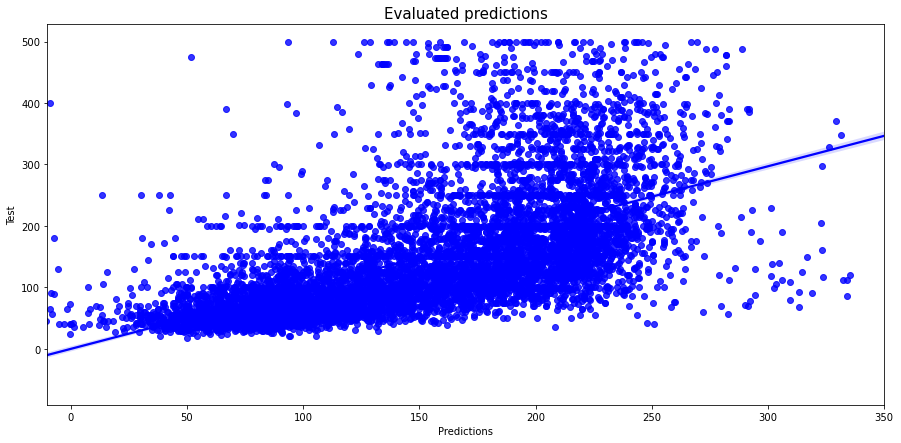

In [244]:
plt.figure(figsize=(15,7))
plt.xlim(-10,350)
sns.regplot(y=y_test, x=predictions, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

In [245]:
pred1 = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2023-06-05/visualisations/listings.csv')

In [246]:
pred1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0,NaN
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1,NaN
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3,NaN
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1,NaN
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23,NaN


In [247]:
pred1['reviews_per_month'] = pred1['reviews_per_month'].fillna(value=0, inplace=False)

In [248]:
pred1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0,NaN
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1,NaN
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3,NaN
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1,NaN
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23,NaN


In [249]:
pred1.drop(['license'], inplace=True, axis=1)


In [250]:
pred1.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10496
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [256]:
pred1.drop(['name', 'host_name','id','last_review'], inplace=True, axis=1)

In [257]:
le = preprocessing.LabelEncoder()

le.fit(pred1['neighbourhood_group'])
pred1['neighbourhood_group']=le.transform(pred1['neighbourhood_group'])

le.fit(pred1['neighbourhood'])
pred1['neighbourhood']=le.transform(pred1['neighbourhood'])

le.fit(pred1['room_type'])
pred1['room_type']=le.transform(pred1['room_type'])

In [258]:
pred1.sort_values('price', ascending=True, inplace=True)


In [259]:
pred1 = pred1[11:-6]


In [260]:
lm = LinearRegression()


In [261]:
X1 = pred1.drop(['price', 'longitude'], inplace=False, axis=1)
y1 = pred1['price']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=101)

lm.fit(X_train1, y_train1)

LinearRegression()

In [262]:
predictions1 = lm.predict(X_test1)

In [263]:
mae1 = metrics.mean_absolute_error(y_test1, predictions1)
mse1 = metrics.mean_squared_error(y_test1, predictions1)
rmse1 = np.sqrt(metrics.mean_squared_error(y_test1, predictions1))
r21 = metrics.r2_score(y_test1, predictions1)

print('MAE (Mean Absolute Error): %s' %mae1)
print('MSE (Mean Squared Error): %s' %mse1)
print('RMSE (Root mean squared error): %s' %rmse1)
print('R2 score: %s' %r21)

MAE (Mean Absolute Error): 136.87116553807402
MSE (Mean Squared Error): 140295.98007869557
RMSE (Root mean squared error): 374.561049868637
R2 score: 0.04842477727660155


In [264]:
error1 = pd.DataFrame({'Actual Values': np.array(y_test1).flatten(), 'Predicted Values': predictions1.flatten()})
error1.head(20)

,Actual Values,Predicted Values
0,150,237.585106
1,74,209.840166
2,200,244.373517
3,326,491.033811
4,203,220.359254
5,75,120.560752
6,50,68.678976
7,119,300.164816
8,120,288.584833
9,74,117.187022


Text(0, 0.5, 'Test')

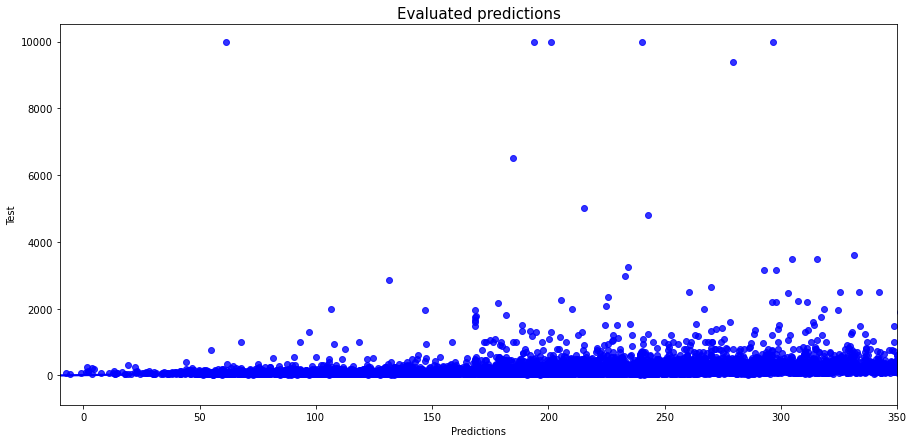

In [265]:
plt.figure(figsize=(15,7))
plt.xlim(-10,350)
sns.regplot(y=y_test1, x=predictions1, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

In [267]:
# ... (Your existing code for label encoding, training, and predicting)

# Reverse label encoding for the 'neighbourhood_group' column
inverse_neighbourhood_group = {label: group for group, label in zip(le.classes_, le.transform(le.classes_))}
error1['Neighbourhood Group'] = pred1['neighbourhood_group'].map(inverse_neighbourhood_group)

# Create a dictionary to map the encoded neighbourhood_group back to their original names
neighbourhood_group_mapping = {
    0: 'Brooklyn',
    1: 'Manhattan',
    2: 'Queens',
    3: 'Staten Island',
    4: 'Bronx'
}

# Replace the encoded neighbourhood_group with their original names in the DataFrame
error1['Neighbourhood Group'] = error1['Neighbourhood Group'].map(neighbourhood_group_mapping)

# Display the evaluation metrics
print('MAE (Mean Absolute Error): %s' % mae)
print('MSE (Mean Squared Error): %s' % mse)
print('RMSE (Root mean squared error): %s' % rmse)
print('R2 score: %s' % r2)

# Display the error DataFrame with predicted and actual values, along with the corresponding neighbourhood_group
print(error1[['Neighbourhood Group', 'Predicted Values', 'Actual Values']].head(50))


MAE (Mean Absolute Error): 58.614096776263665
MSE (Mean Squared Error): 6577.082606111642
RMSE (Root mean squared error): 81.09921458381481
R2 score: 0.354382833460982
   Neighbourhood Group  Predicted Values  Actual Values
0            Manhattan        237.585106            150
1               Queens        209.840166             74
2               Queens        244.373517            200
3            Manhattan        491.033811            326
4               Queens        220.359254            203
5               Queens        120.560752             75
6               Queens         68.678976             50
7               Queens        300.164816            119
8            Manhattan        288.584833            120
9               Queens        117.187022             74
10           Manhattan        209.675821             51
11              Queens        132.044144             64
12              Queens        249.914327            450
13              Queens         98.570656        

In [268]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already processed the data and created X_train, X_test, y_train, y_test

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)
rf_model.fit(X_train, y_train)

# Make predictions using the trained model
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_mae = metrics.mean_absolute_error(y_test, rf_predictions)
rf_mse = metrics.mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
rf_r2 = metrics.r2_score(y_test, rf_predictions)

# Display the evaluation metrics for Random Forest Regression
print('Random Forest Regression Metrics:')
print('MAE: %s' % rf_mae)
print('MSE: %s' % rf_mse)
print('RMSE: %s' % rf_rmse)
print('R2 score: %s' % rf_r2)


Random Forest Regression Metrics:
MAE: 44.89202583131459
MSE: 4396.187523042184
RMSE: 66.30375195297913
R2 score: 0.5684630554034278


In [269]:
rf_predictions = rf_model.predict(X_test)

# Create a DataFrame to store actual and predicted prices
comparison_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': rf_predictions})

# Display the first few rows of the DataFrame
print(comparison_df.head(20))



       Actual Prices  Predicted Prices
32780             38             68.95
22502            108            150.94
140               84            168.90
2465              85             92.69
17345            159            261.84
37171            125            101.06
20528            474            480.97
5499              70            102.66
36709            103            157.04
3101              47             83.93
3073             153            265.52
15045            185            168.78
15802             99            186.46
11208             75             73.17
8652              95             93.00
33544            191            250.63
32653            195            311.09
14880             32             34.08
3964             125            184.51
11396             32             61.45


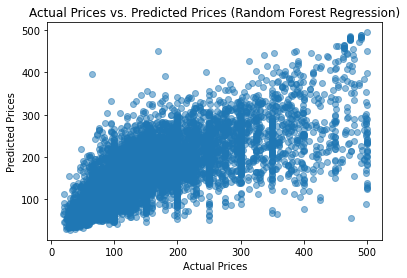

In [270]:
# Create a scatter plot to compare the actual vs. predicted prices
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Random Forest Regression)')
plt.show()

In [271]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have the features in X and the target variable (price) in y
# Replace 'X' and 'y' with your actual feature matrix and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create the XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions using the model on the test data
predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display the evaluation metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)


Mean Absolute Error (MAE): 46.17613422157914
Mean Squared Error (MSE): 4471.626134773453
Root Mean Squared Error (RMSE): 66.87021859373164
R-squared (R2) Score: 0.5610578781127669
